# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [186]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [187]:
Y = data['affair']

In [188]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [190]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [191]:
predictions = model.predict_proba(X_test)

In [139]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [192]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [75]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


#### Оценка качества модели

Считаем accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

#predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

## Создание функции roc_curve (руками)

In [182]:
def roc_curve_hand(y_true, y_score, pos_label = 1):
    tpr_all = []
    fpr_all = []

    scores_ = sorted(np.append(y_score, max(y_score) + 1), reverse=True)

    for i in scores_:
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative

        for predicted_prob, actual in zip( y_score, y_true ):

            if predicted_prob >= i:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == pos_label:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == pos_label:
                    fn += 1
                else:
                    tn += 1

        tpr_ = tp / (tp + fn)
        fpr_ = fp / (fp + tn)

        tpr_all.append(tpr_)
        fpr_all.append(fpr_)
    
    thresholdsF = scores_
    
    return fpr_all, tpr_all, thresholdsF


In [193]:
#fprF, tprF, thresholds = roc_curve_hand(Y_test, predictions[:, 1], pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, predictions[:, 1])

print('tpr', tpr, 'fpr', fpr, 'thresholds', thresholds)
#print('tprF', tprF, 'fprF', fprF, 'thresholds', thresholds)

tpr [0.         0.00164745 0.00823723 0.00823723 0.01976936 0.01976936
 0.02306425 0.02306425 0.03130148 0.03130148 0.03789127 0.03789127
 0.04118616 0.04118616 0.04942339 0.04942339 0.05766063 0.05766063
 0.06589786 0.06589786 0.06919275 0.06919275 0.07248764 0.07248764
 0.07413509 0.07413509 0.07578254 0.07578254 0.08896211 0.08896211
 0.09555189 0.09555189 0.10049423 0.10049423 0.11367381 0.11367381
 0.11532125 0.11532125 0.1169687  0.1169687  0.11861614 0.12191104
 0.12685338 0.12685338 0.13344316 0.13344316 0.1383855  0.1383855
 0.14003295 0.14003295 0.1416804  0.1416804  0.14497529 0.14497529
 0.14662273 0.14662273 0.14991763 0.14991763 0.15321252 0.15321252
 0.15650741 0.15650741 0.16474465 0.16474465 0.16639209 0.16639209
 0.17462932 0.17462932 0.17957166 0.17957166 0.1878089  0.1878089
 0.19110379 0.19275124 0.19275124 0.19769357 0.19769357 0.20263591
 0.20263591 0.20757825 0.20757825 0.2092257  0.2092257  0.21087315
 0.21087315 0.22240527 0.22405272 0.22570016 0.22570016 0.23

In [152]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.6136125654450262

In [153]:
precision = tp / (tp + fp)
precision

0.33161953727506427

### Используем готовые библиотеки

In [21]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [194]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [195]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923256930843)
(0.3230277185501066, 0.9983525535420099, 0.07617596155843387)
(0.3232, 0.9983525535420099, 0.07800501621477728)
(0.3233724653148346, 0.9983525535420099, 0.07833731228363622)
(0.32354511478910836, 0.9983525535420099, 0.07858652838589192)
(0.32371794871794873, 0.9983525535420099, 0.07969132529032431)
(0.3238909673971138, 0.9983525535420099, 0.0798710657696646)
(0.3240641711229946, 0.9983525535420099, 0.08031367562635408)
(0.32423756019261635, 0.9983525535420099, 0.08053860857653214)
(0.3238758029978587, 0.9967051070840197, 0.08068797237373698)
(0.32404927691483665, 0.9967051070840197, 0.08099233380816535)
(0.3236870310825295, 0.9950576606260296, 0.08121210578952326)
(0.32386058981233246, 0.9950576606260296, 0.08256996880348906)
(0.3240343347639485, 0.9950576606260296, 0.08293373585077772)
(0.32420826623725174, 0.9950576606260296, 0.08296584590494263)
(0.32438238453276047, 0.9950576606260296, 0.08327802130378685)
(0.3247311827956989, 0.99505

In [24]:
from sklearn.metrics import average_precision_score

In [25]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.31613136915949225

### ROC

In [26]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [217]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
# применим созданную функцию
fpr_hand, tpr_hand, thres_hand = roc_curve_hand( Y_test, predictions[:, 1])

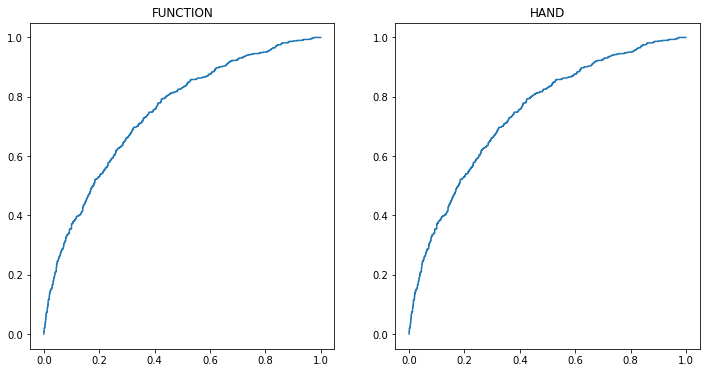

In [218]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 6)
)

ax1.plot( fpr, tpr )
ax1.set_title('FUNCTION')

ax2.plot( fpr_hand, tpr_hand )
ax2.set_title('HAND')

plt.show()


**Построим еще одну модель и сравним их между собой**

In [137]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [138]:
model2 = LogisticRegression()

In [139]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [140]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
predictions2 = model2.predict_proba( X_test_short )

In [143]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
# применим созданную функцию
fpr_hand2, tpr_hand2, thres_hand2 = roc_curve_hand( Y_test, predictions2[:, 1])

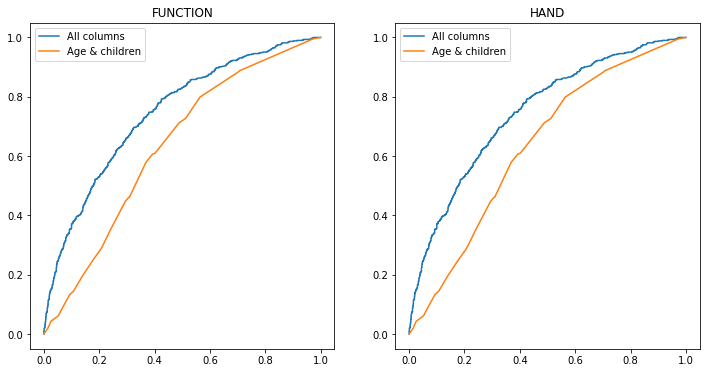

In [145]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 6)
)

ax1.set_title('FUNCTION')

ax1.plot( fpr, tpr, label = 'All columns' )
ax1.plot( fpr2, tpr2, label = 'Age & children' )

#ax1.xlabel('False Positive Rate')
#ax1.ylabel('True Positive Rate')

ax1.legend( loc = 0 )

ax2.set_title('HAND')

ax2.plot( fpr_hand, tpr_hand, label = 'All columns' )
ax2.plot( fpr_hand2, tpr_hand2, label = 'Age & children' )

#ax2.xlabel('False Positive Rate')
#ax2.ylabel('True Positive Rate')

ax2.legend( loc = 0 )

plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [37]:
from sklearn.metrics import roc_curve

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [40]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [41]:
from sklearn.metrics import auc

In [42]:
auc( fpr, tpr )

0.5332242683179651

In [43]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [146]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictionsl1 = model1.predict_proba( X_test )

In [147]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictionsl2 = model2.predict_proba( X_test )

In [148]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictionsl2_1 = model3.predict_proba( X_test )

In [151]:
fpr, tpr, thres = roc_curve( Y_test, predictionsl1[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictionsl2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictionsl2_1[:, 1] )
# применим созданную функцию
fpr_hand, tpr_hand, thres_hand = roc_curve_hand( Y_test, predictionsl1[:, 1] )
fpr2_hand, tpr2_hand, thres2_hand = roc_curve_hand( Y_test, predictionsl2[:, 1] )
fpr3_hand, tpr3_hand, thres3_hand = roc_curve_hand( Y_test, predictionsl2_1[:, 1] )

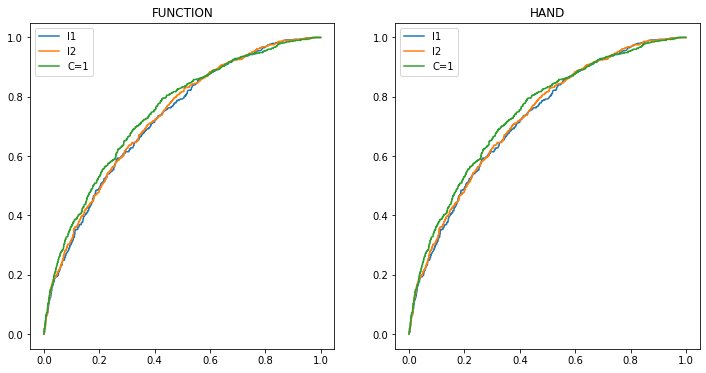

In [152]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 6)
)

ax1.set_title('FUNCTION')
ax2.set_title('HAND')

ax1.plot( fpr, tpr, label = 'l1' )
ax1.plot( fpr2, tpr2, label = 'l2' )
ax1.plot( fpr3, tpr3, label = 'C=1' )

#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

ax1.legend( loc = 0 )

ax2.plot( fpr_hand, tpr_hand, label = 'l1' )
ax2.plot( fpr2_hand, tpr2_hand, label = 'l2' )
ax2.plot( fpr3_hand, tpr3_hand, label = 'C=1' )

#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

ax2.legend( loc = 0 )

plt.show()

**Построим еще одну модель, используя другие признаки**

In [198]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [199]:
Y = data['affair']

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [201]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [206]:
predictions0 = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [214]:
fpr, tpr, thres = roc_curve( Y_test, predictions0[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )
# применим созданную функцию
fpr_hand, tpr_hand, thres_hand = roc_curve_hand( Y_test, predictions0[:, 1] )
#fpr2_hand, tpr2_hand, thres2_hand, prec2 = roc_curve_hand( Y_test, predictions2[:, 1] )
#fpr3_hand, tpr3_hand, thres3_hand, prec3 = roc_curve_hand( Y_test, predictions3[:, 1] )

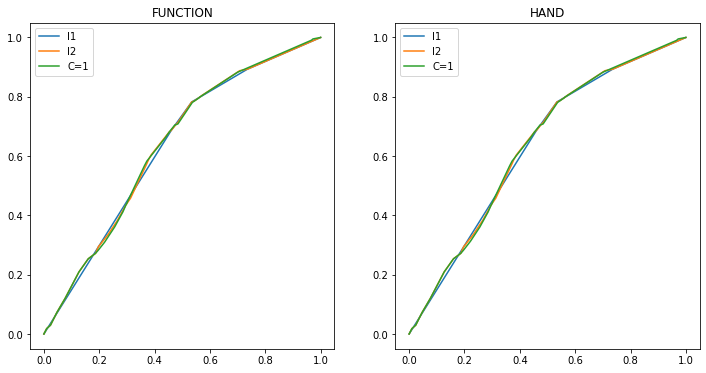

In [208]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 6)
)

ax1.set_title('FUNCTION')
ax2.set_title('HAND')

ax1.plot( fpr, tpr, label = 'l1' )
ax1.plot( fpr2, tpr2, label = 'l2' )
ax1.plot( fpr3, tpr3, label = 'C=1' )

#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

ax1.legend( loc = 0 )

ax2.plot( fpr_hand, tpr_hand, label = 'l1' )
ax2.plot( fpr2_hand, tpr2_hand, label = 'l2' )
ax2.plot( fpr3_hand, tpr3_hand, label = 'C=1' )

#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

ax2.legend( loc = 0 )

plt.show()

## Поcтроить график Precision - Recall на этих же данных

In [252]:
pr, re, thres = precision_recall_curve( Y_test, predictions0[:, 1] )
pr, re, thres

(array([0.31780105, 0.36133333, 0.40563621, 0.4100295 , 1.        ]),
 array([1.        , 0.89291598, 0.78253707, 0.68698517]),
 array([0.27977719, 0.28149244, 0.38514659, 0.38716058]))

In [242]:
pr_hand, re_hand = precision_recall_curve_hand( Y_test, predictions0[:, 1] )
pr_hand

[0.31780104712041884,
 0.36133333333333334,
 0.40563620836891545,
 0.41002949852507375]

In [243]:
def precision_recall_curve_hand(y_true, y_score, pos_label = 1):
    
    recall_all = []
    precision_all = []
    
    #scores_ = sorted(np.append(y_score, max(y_score) + 1), reverse=True)
    scores_ = np.unique(y_score)

    for i in scores_:
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative

        for predicted_prob, actual in zip( y_score, y_true ):

            if predicted_prob >= i:
                predicted = 1
            else:
                predicted = 0

            if predicted == 1:
                if actual == pos_label:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == pos_label:
                    fn += 1
                else:
                    tn += 1

        recall_ = tp / (tp + fn)
        precision_ = tp / (tp + fp)
        
        recall_all.append(recall_)
        precision_all.append(precision_)
    
    return precision_all, recall_all


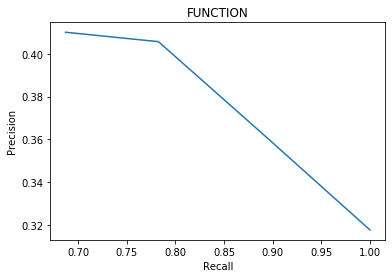

In [257]:
plt.plot( re[:4], pr[:4] )

plt.title('FUNCTION')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

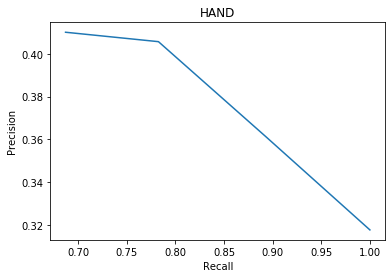

In [258]:
plt.plot( re_hand, pr_hand )

plt.title('HAND')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()